Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 15-May-2025

In [183]:
import pandas as pd
import numpy as np

In [316]:
# Set directory 
data_dir = r'Z:/Data/Roadrunner/CsChrimson_arena/'
save_name = 'roadrunner_sparc.csv'

In [318]:
# Load original dataframe
df = pd.read_csv(data_dir + 'roadrunner_sparc_orig.csv') 

# Populate new dataframe
df_new = pd.DataFrame()
 
#s = df["SET"]
#s = s.replace("set1", 1)
#s = s.replace("set2", 2)
#df_new["set"] = s.tolist()

df.loc[~df["SET"].isin(['Bilateral', 'Left', 'Right']), "SET"] = "Empty"
df_new["set"] = df["SET"]

s = df["INTENSITY"]
s = s.replace("int_1", 1)
s = s.replace("int_3", 3)
s = s.replace("int_5", 5)
s = s.replace("int_7", 7)
s = s.replace("int_9", 9)
s = s.replace("int9", 9)
df_new["intensity"] = s.tolist()

s = df["FLYID"]
s = s-s.min()+1
df_new["animal_id"] = s.tolist()

df_new["frame"] = df["frame"].tolist()
df_new["time"] = df["time"].tolist()
df_new["stimulus"] = df["LED"].tolist()
df_new["x"] = df["X#wcentroid (mm)"].tolist()
df_new["y"] = df["Y#wcentroid (mm)"].tolist()
df_new["forward_velocity"] = df["VFORWARD#wcentroid (mm/s)"].tolist()
df_new["lateral_velocity"] = df["VLATERAL#wcentroid (mm/s)"].tolist()
df_new["angular_velocity"] = df["VANGULAR#head (deg/s)"].tolist()
df_new["speed"] = df["SPEED#wcentroid (mm/s)"].tolist()

C:\Users\Chris\AppData\Local\Temp\ipykernel_6096\748088847.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir + 'roadrunner_sparc_orig.csv')
C:\Users\Chris\AppData\Local\Temp\ipykernel_6096\748088847.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = s.replace("int9", 9)


In [319]:
df_new

,set,intensity,animal_id,frame,time,stimulus,x,y,forward_velocity,lateral_velocity,angular_velocity,speed
0,Bilateral,9,1,1,0.05,0,71.1,40.2,0.000000,0.000000,0.000000,0.0
1,Bilateral,9,1,2,0.10,0,71.1,40.2,0.000000,0.000000,-45.210038,0.0
2,Bilateral,9,1,3,0.15,0,71.1,40.2,0.000000,0.000000,45.210038,0.0
3,Bilateral,9,1,4,0.20,0,71.1,40.2,0.000000,0.000000,-15.696492,0.0
4,Bilateral,9,1,5,0.25,0,71.1,40.2,-1.086503,-1.679140,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
455395,Right,9,33,13796,689.80,0,55.5,85.8,-0.124035,0.992278,6.127832,1.0
455396,Right,9,33,13797,689.85,0,55.5,85.9,0.000000,0.000000,0.000000,0.0
455397,Right,9,33,13798,689.90,0,55.5,85.8,0.124035,-0.992278,0.000000,1.0
455398,Right,9,33,13799,689.95,0,55.5,85.8,-0.124035,0.992278,0.000000,1.0


In [320]:
# Update stimulus and rename
animal_ids = df_new.animal_id.unique().tolist()
for animal_id in animal_ids:
    stimulus = df_new.stimulus[df_new.animal_id==animal_id].to_numpy()
    stimulus_onset_indices = np.argwhere(np.diff(stimulus)>0)+1
    stimulus_offset_indices = np.argwhere(np.diff(stimulus)<0)
    
    n_presentation = 0
    for index, _ in enumerate(stimulus_onset_indices):
        stimulus[stimulus_onset_indices[index][0]:stimulus_offset_indices[index][0]] += n_presentation
        n_presentation += 1

    df_new.loc[df_new.index[df_new.animal_id==animal_id], "stimulus"] = stimulus

df_new = df_new.rename(columns={"stimulus": "n_stimulus"})

In [321]:
# # Example
# x = np.array([0,-1,0,2,4,0,-2,-4,-5,-4])
# y = np.array([0,-1,-2,-3,-1,-1,-4,-1,0,1])
# t = np.array([0,1,2,3,4,5,6,7,8,9])
# angular_velocity = compute_angular_velocity(x,y,t)
# plt.plot(x,y,'o-')
# plt.show()
# plt.plot(angular_velocity)
# plt.show()

def compute_angular_velocity(x,y,t):

    # Compute signed angular velocity based on centered difference
    # Positive values indicate counterclockwise movement
   
    dx1 = x[1:-1] - x[:-2]
    dy1 = y[1:-1] - y[:-2]
    dx2 = x[2:] - x[1:-1]
    dy2 = y[2:] - y[1:-1]

    cross = dx1*dy2 - dy1*dx2
    dot = dx1*dx2 + dy1*dy2
    
    delta_theta = np.atan2(cross, dot) # Cross product gives sign, dot product gives magnitude
    delta_t = t[2:] - t[:-2]
    
    angular_velocity = delta_theta / delta_t 
    angular_velocity = angular_velocity * 180/np.pi
    
    # Add nan at boundaries
    angular_velocity = np.insert(angular_velocity, 0, np.nan, axis=0)
    angular_velocity = np.insert(angular_velocity, len(angular_velocity), np.nan, axis=0)
    
    return angular_velocity

In [311]:
# # Add angular velocity of COM based on x-y coordinates 
# angular_velocity_com = []
# animal_ids = df_new.animal_id.unique().tolist()
# for animal_id in animal_ids:
#     x = df_new.x[df_new.animal_id==animal_id].to_numpy()
#     y = df_new.y[df_new.animal_id==animal_id].to_numpy()
#     t = df_new.time[df_new.animal_id==animal_id].to_numpy()
# 
#     angular_velocity = compute_angular_velocity(x,y,t)
#     df_new.loc[df_new.index[df_new.animal_id==animal_id], "angular_velocity_com"] = angular_velocity

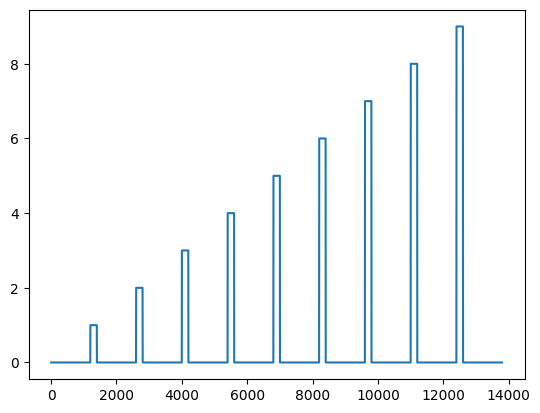

In [322]:
# Plot updated stimulus
import matplotlib.pyplot as plt

stimulus = df_new.n_stimulus[df_new.animal_id==animal_id].to_numpy()
plt.plot(stimulus)
plt.show()

In [323]:
# Save new dataframe
df_new.to_csv(data_dir + save_name, index=False)